# Stack / Queue

## Lv1. 탑
수평 직선에 탑 N대를 세웠습니다. 모든 탑의 꼭대기에는 신호를 송/수신하는 장치를 설치했습니다.  
발사한 신호는 신호를 보낸 탑보다 높은 탑에서만 수신합니다. 또한, 한 번 수신된 신호는 다른 탑으로 송신되지 않습니다.  
예를 들어 높이가 6, 9, 5, 7, 4인 다섯 탑이 왼쪽으로 동시에 레이저 신호를 발사합니다.  
그러면, 탑은 다음과 같이 신호를 주고받습니다.  
높이가 4인 다섯 번째 탑에서 발사한 신호는 높이가 7인 네 번째 탑이 수신하고,  
높이가 7인 네 번째 탑의 신호는 높이가 9인 두 번째 탑이, 높이가 5인 세 번째 탑의 신호도 높이가 9인 두 번째 탑이 수신합니다.  
높이가 9인 두 번째 탑과 높이가 6인 첫 번째 탑이 보낸 레이저 신호는 어떤 탑에서도 수신할 수 없습니다.
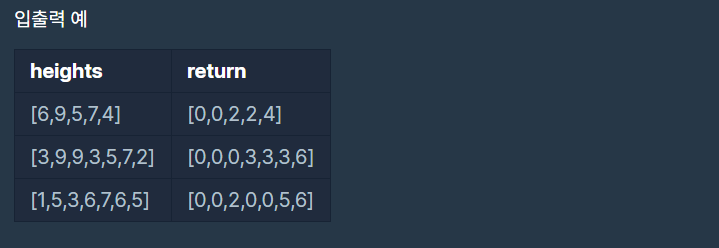

In [1]:
def solution(heights):
    answer = [0 for _ in range(len(heights))]
    for i in range(len(heights)-1, -1, -1):
        for j in range(i-1, -1, -1):
            if heights[j]>heights[i]:
                answer[i]=j+1
                break
    return answer
solution([6, 9, 5, 7, 4])

[0, 0, 2, 2, 4]

## Lv.2 다리를 지나는 트럭
트럭 여러 대가 강을 가로지르는 일 차선 다리를 정해진 순으로 건너려 합니다.  
모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 알아내야 합니다.   
트럭은 1초에 1만큼 움직이며, 다리 길이는 bridge_length이고 다리는 무게 weight까지 견딥니다.  
※ 트럭이 다리에 완전히 오르지 않은 경우, 이 트럭의 무게는 고려하지 않습니다.   
solution 함수의 매개변수로 다리 길이 bridge_length, 다리가 견딜 수 있는 무게 weight, 트럭별 무게 truck_weights가 주어집니다.  
이때 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 return 하도록 solution 함수를 완성하세요.

In [3]:
import collections

def solution(bridge_length, weight, truck_weights):
    watingTrucks=collections.deque(truck_weights)
    currentWeight=0
    onRoad=[]
    onRoadNum=0
    passed=0
    time=1
    i=0
    while passed<len(truck_weights):
        if len(truck_weights)==0:
            return 0
        if len(watingTrucks)>0:
            if currentWeight+watingTrucks[0]<=weight:
                currentWeight+=watingTrucks.popleft()
                onRoad.append(0)
                onRoadNum+=1
        for j in range(i, onRoadNum):
            onRoad[j]+=1
            if onRoad[j]==bridge_length:
                currentWeight-=int(truck_weights[j])
                passed+=1
                i+=1
                
        time+=1
    return time
solution(2, 10, [7,4,5,6])

8

## Lv.2 프린터
일반적인 프린터는 인쇄 요청이 들어온 순서대로 인쇄합니다. 그렇기 때문에 중요한 문서가 나중에 인쇄될 수 있습니다. 이런 문제를 보완하기 위해 중요도가 높은 문서를 먼저 인쇄하는 프린터를 개발했습니다. 이 새롭게 개발한 프린터는 아래와 같은 방식으로 인쇄 작업을 수행합니다.

1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.
예를 들어, 4개의 문서(A, B, C, D)가 순서대로 인쇄 대기목록에 있고 중요도가 2 1 3 2 라면 C D A B 순으로 인쇄하게 됩니다.

내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 알고 싶습니다. 위의 예에서 C는 1번째로, A는 3번째로 인쇄됩니다.

현재 대기목록에 있는 문서의 중요도가 순서대로 담긴 배열 priorities와 내가 인쇄를 요청한 문서가 현재 대기목록의 어떤 위치에 있는지를 알려주는 location이 매개변수로 주어질 때, 내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 return 하도록 solution 함수를 작성해주세요.


In [1]:
def solution(priorities, location):
    order=[i for i in range(len(priorities))]
    count=0
    while True:
        if priorities[0]==max(priorities):
            count+=1
            if order[0]==location: break
            else:
                priorities.pop(0)
                order.pop(0)
        else:
            priorities.append(priorities.pop(0))
            order.append(order.pop(0))
    return (count)
solution([1, 1, 9, 1, 1, 1], 0)

5

## Lv. 2 쇠막대기
여러 개의 쇠막대기를 레이저로 절단하려고 합니다. 효율적인 작업을 위해서 쇠막대기를 아래에서 위로 겹쳐 놓고, 레이저를 위에서 수직으로 발사하여 쇠막대기들을 자릅니다. 쇠막대기와 레이저의 배치는 다음 조건을 만족합니다.

- 쇠막대기는 자신보다 긴 쇠막대기 위에만 놓일 수 있습니다.
- 쇠막대기를 다른 쇠막대기 위에 놓는 경우 완전히 포함되도록 놓되, 끝점은 겹치지 않도록 놓습니다.
- 각 쇠막대기를 자르는 레이저는 적어도 하나 존재합니다.
- 레이저는 어떤 쇠막대기의 양 끝점과도 겹치지 않습니다.
아래 그림은 위 조건을 만족하는 예를 보여줍니다. 수평으로 그려진 굵은 실선은 쇠막대기이고, 점은 레이저의 위치, 수직으로 그려진 점선 화살표는 레이저의 발사 방향입니다.
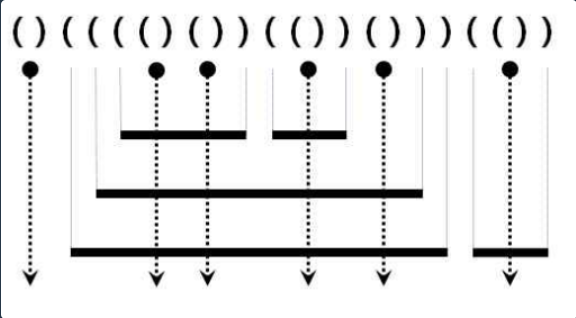
이러한 레이저와 쇠막대기의 배치는 다음과 같이 괄호를 이용하여 왼쪽부터 순서대로 표현할 수 있습니다.

(a) 레이저는 여는 괄호와 닫는 괄호의 인접한 쌍 '()'으로 표현합니다. 또한 모든 '()'는 반드시 레이저를 표현합니다.
(b) 쇠막대기의 왼쪽 끝은 여는 괄호 '('로, 오른쪽 끝은 닫힌 괄호 ')'로 표현됩니다.
위 예의 괄호 표현은 그림 위에 주어져 있습니다.
쇠막대기는 레이저에 의해 몇 개의 조각으로 잘리는데, 위 예에서 가장 위에 있는 두 개의 쇠막대기는 각각 3개와 2개의 조각으로 잘리고, 이와 같은 방식으로 주어진 쇠막대기들은 총 17개의 조각으로 잘립니다.

쇠막대기와 레이저의 배치를 표현한 문자열 arrangement가 매개변수로 주어질 때, 잘린 쇠막대기 조각의 총 개수를 return 하도록 solution 함수를 작성해주세요.

In [2]:
def solution(arrangement):
    pole=0
    count=0
    pre=None
    for char in arrangement:
        if char=='(':
            #일단 막대 시작이라고 생각하자.
            pole+=1
            pre='('
        elif char == ')':
            #레이저일 경우
            if pre=='(':
                pole-=1
                count+=pole
                pre=')'
            #막대 끝나는 지점일 경우
            else:
                pole-=1
                count+=1
                pre=')'

    return count
solution("()(((()())(())()))(())")


17